Dataset loaded successfully!
Total rows: 1460
Total columns: 81
------------------------------

Missing values in selected columns:
GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64

Model trained successfully.

Mean Squared Error (MSE): 2,806,426,667.25
R-squared (Accuracy): 0.63


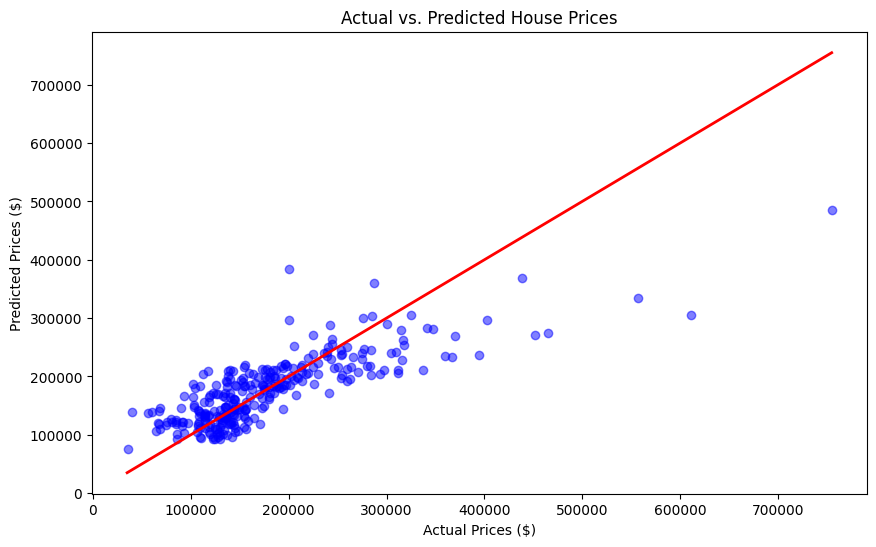


Example Prediction:
A house with 2000 sqft, 3 Bedrooms, and 2 Bathrooms is estimated to cost: $240,377.51


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------------------------------------
# STEP 1: LOAD DATA DIRECTLY FROM GITHUB
# ---------------------------------------------------------
# We use a raw URL to the dataset so you don't have to download/upload manually
url = "https://raw.githubusercontent.com/data-doctors/kaggle-house-prices-advanced-regression-techniques/master/data/train.csv"
data = pd.read_csv(url)

print("Dataset loaded successfully!")
print(f"Total rows: {data.shape[0]}")
print(f"Total columns: {data.shape[1]}")
print("-" * 30)

# ---------------------------------------------------------
# STEP 2: SELECT FEATURES & TARGET
# ---------------------------------------------------------
# Based on your task requirements:
# Square Footage -> 'GrLivArea'
# Bedrooms       -> 'BedroomAbvGr'
# Bathrooms      -> 'FullBath'
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Prepare X (inputs) and y (output)
X = data[features]
y = data[target]

# Check for missing values (good practice)
print("\nMissing values in selected columns:")
print(X.isnull().sum())

# ---------------------------------------------------------
# STEP 3: SPLIT DATA
# ---------------------------------------------------------
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------------------------------------------
# STEP 4: TRAIN THE MODEL
# ---------------------------------------------------------
model = LinearRegression()
model.fit(X_train, y_train)

print("\nModel trained successfully.")

# ---------------------------------------------------------
# STEP 5: EVALUATION
# ---------------------------------------------------------
# Predict on the test data
y_pred = model.predict(X_test)

# Calculate error metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:,.2f}")
print(f"R-squared (Accuracy): {r2:.2f}")

# ---------------------------------------------------------
# STEP 6: VISUALIZATION
# ---------------------------------------------------------
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2) # Diagonal line
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs. Predicted House Prices")
plt.show()

# ---------------------------------------------------------
# STEP 7: PREDICT CUSTOM PRICE
# ---------------------------------------------------------
# Let's test it: A house with 2000 sqft, 3 Bedrooms, 2 Bathrooms
new_data = pd.DataFrame([[2000, 3, 2]], columns=features)
prediction = model.predict(new_data)

print(f"\nExample Prediction:")
print(f"A house with 2000 sqft, 3 Bedrooms, and 2 Bathrooms is estimated to cost: ${prediction[0]:,.2f}")